<a href="https://colab.research.google.com/github/wakamoia/tareitas-clase-IA-y-RN/blob/main/A3_Entrenamiento_de_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PATRICIA SOFIA MOYA TOBIAS**

**IMTC 1954922**

A3: Entrenamiento de Red Neuronal Artificial simple.

*Lo primero que tenemos que hacer es importar las librerias de tensorflow*

In [60]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt


*Luego hay que hacer la normalización para que vaya identificando las diferentes formas de escribir un número*



In [18]:
#Normalización
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [63]:
class_names = ['cero', 'uno', 'dos', 'tres' ,'cuatro' ,'cinco','seis','siete', 'ocho',  'nueve']
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)
#Rango de la gama de color que llega hasta 255
train_images = train_images / 255.0

test_images = test_images / 255.0

10000

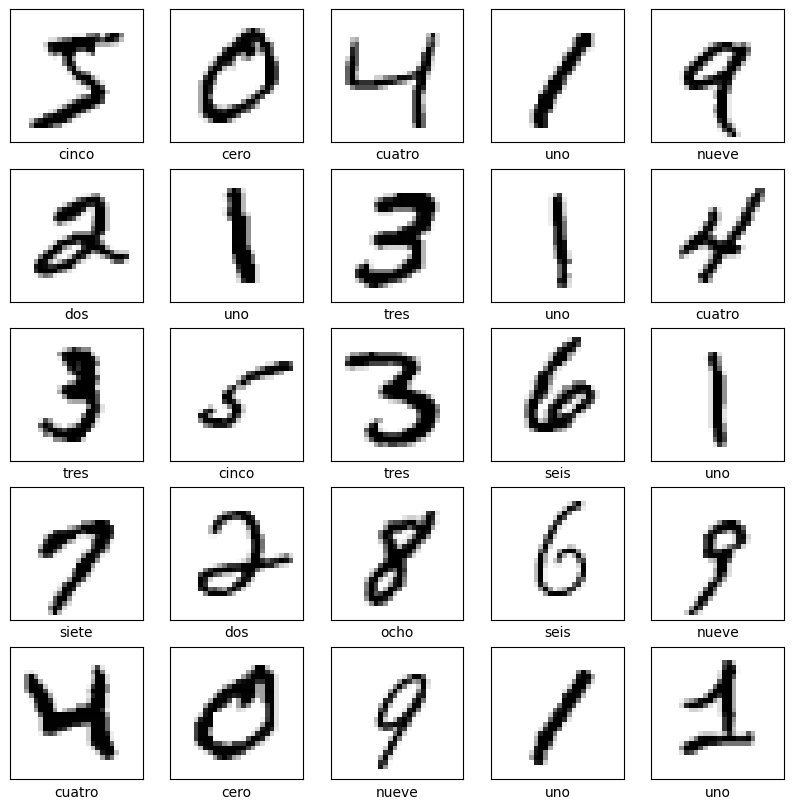

In [76]:
#Muestra de 25 números para que los relacione con su nombre
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [80]:
#Construir un modelo para poder configurar las capas 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [81]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

*Entrenamiento*

In [89]:
#Aqui ya se empieza a entrenar a la red
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9869 - accuracy: 0.7049
Epoch 2/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9716 - accuracy: 0.7096
Epoch 3/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9575 - accuracy: 0.7146
Epoch 4/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9441 - accuracy: 0.7174
Epoch 5/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9310 - accuracy: 0.7218
Epoch 6/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9182 - accuracy: 0.7266
Epoch 7/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9065 - accuracy: 0.7292
Epoch 8/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8953 - accuracy: 0.7322


In [90]:
#Aqui podemos ver que tenemos una precision del 73% 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.8787 - accuracy: 0.7387 - 480ms/epoch - 2ms/step

Test accuracy: 0.7386999726295471


In [92]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

313/313 [==============================] - 1s 2ms/step


7

In [96]:
#Se le dice a la red que haga una predicción para ver el entrenamiento previo en acción
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
 

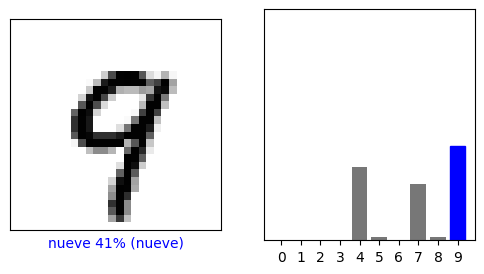

In [94]:
#Ejemplo 
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

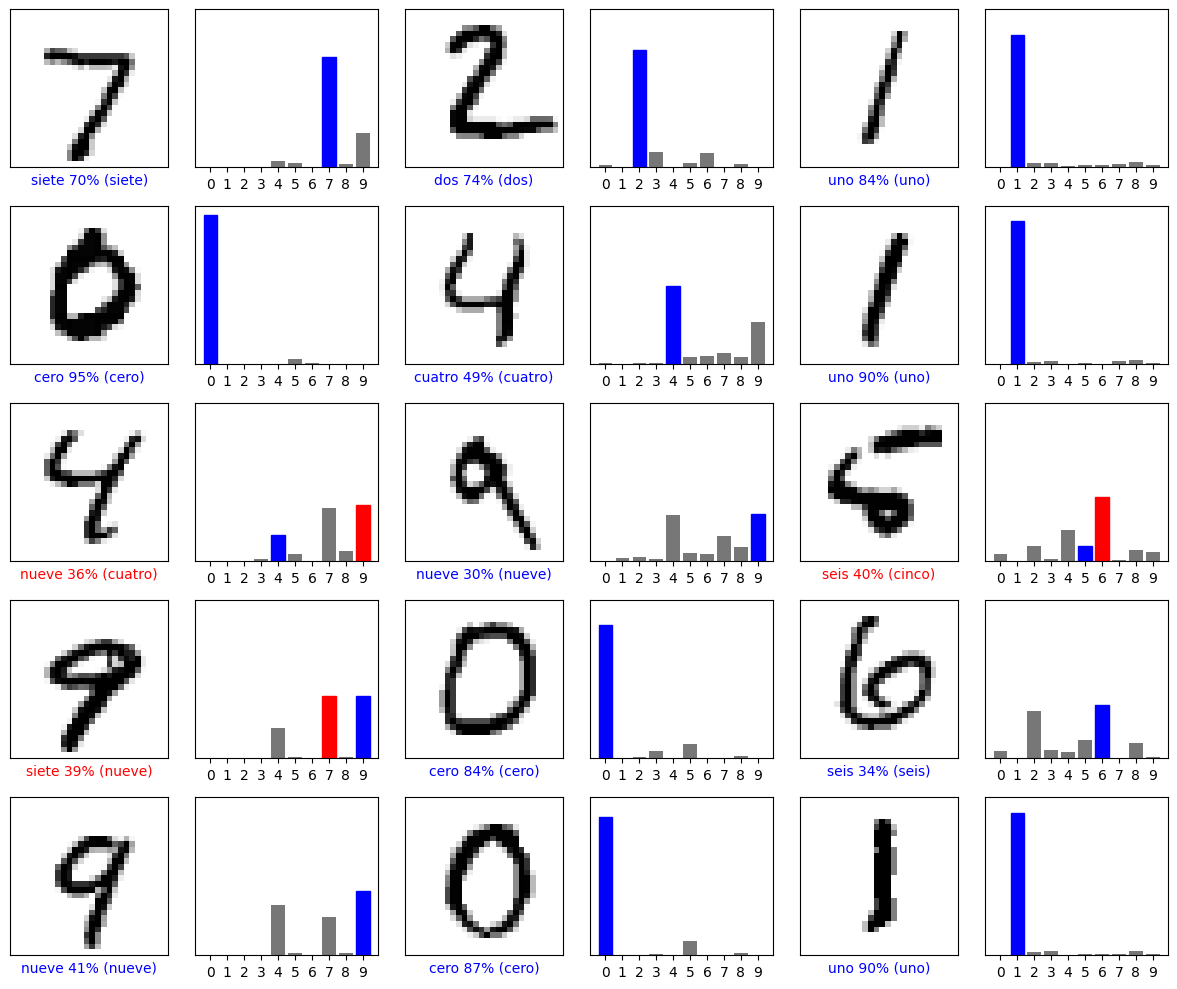

In [100]:
# Aquí se muestran algunas pruebas del aprendizaje de nuestra red, según el análisis que hicimos,
#debe tener una exactitud del 73%
# El color azul es la predicción correcta mientras que la de color rojo es la incorrecta
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()